In [101]:
import pandas as pd
import numpy as np

# Load the database
At this step, i will load the database and then perform a visualization of the variables 

In [148]:
database = pd.read_csv('melb_data.csv')
database.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [103]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [149]:
for column in database.select_dtypes(include =['object']):
    unique_values = np.unique(database[column].astype(str))
    print(f"Unique values for column '{column}':")
    print(unique_values.size)

Unique values for column 'Suburb':
314
Unique values for column 'Address':
13378
Unique values for column 'Type':
3
Unique values for column 'Method':
5
Unique values for column 'SellerG':
268
Unique values for column 'Date':
58
Unique values for column 'CouncilArea':
34
Unique values for column 'Regionname':
8


# Categorical variables
we check the number categories of each categorical variable has to determine how to handle each variable

In [71]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Null values
we check variables with null values and type of variable

In [150]:
data_nulls = database.isnull().sum()
data_nulls[0:20]

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Lattitude          0
Longtitude         0
Regionname         0
dtype: int64

# Fill the values empty of the 'Car' column
For this column fill the values empty with zero value, but create a new column named 'FillCar'. 'FillCar' have a '1' value if its value 'car' was null 

In [151]:
database['FillCar'] = 0
database.loc[database['Car'].isnull(),'FillCar']= 1
database['Car'] = database['Car'].fillna(0)

In [152]:
print(database.dropna().shape)
data_final1=database.dropna().size

(6196, 22)


In [153]:
print(database.dropna(axis=1).shape)
data_final2=database.dropna(axis=1).size

(13580, 19)


In [154]:
data_original = database.size
porcent_rows_lossed = data_final1/data_original
porcent_columns_lossed = data_final2/data_original

print((1-porcent_rows_lossed)*100)
print((1-porcent_columns_lossed)*100)

54.37407952871871
13.636363636363635


# handling nulls value

In this point we're seeing that there are many data lossing, i can eliminate the columns which are data lossing (BuildingArea, YearBuilt, CouncilArea),we would loss 13.64% of data.

Other option is eliminate the rows with one or more data lossing, with this option i'll 54.37% of data

I'm going to eliminate the columns which are have one or more data lossing.



In [155]:
database = database.dropna(axis=1)
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  Lattitude      13580 non-null  float64
 15  Longtitude     13580 non-null  float64
 16  Regionname     13580 non-null  object 
 17  Propertycount  13580 non-null  float64
 18  FillCa

# Change the data type of dates



In [156]:
database.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,FillCar
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0,0


In [157]:
database['Date'] = pd.to_datetime(database['Date'],format='%d/%m/%Y')
database['Date'].head()
database.to_csv('Database_1.csv',index=False) #import the clean database to format csv

In [158]:
database['Day'] = database['Date'].dt.day
database['Month'] = database['Date'].dt.month
database['Year'] = database['Date'].dt.year
database = database.drop(columns=['Date'])

database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13580 non-null  float64
 12  Landsize       13580 non-null  float64
 13  Lattitude      13580 non-null  float64
 14  Longtitude     13580 non-null  float64
 15  Regionname     13580 non-null  object 
 16  Propertycount  13580 non-null  float64
 17  FillCar        13580 non-null  int64  
 18  Day   

# CODIFING VARIABLES
   ## codifing  'Type'
codifing with dummy the variable 'type'

In [159]:
dummy_type = pd.get_dummies(database['Type'], prefix='type')

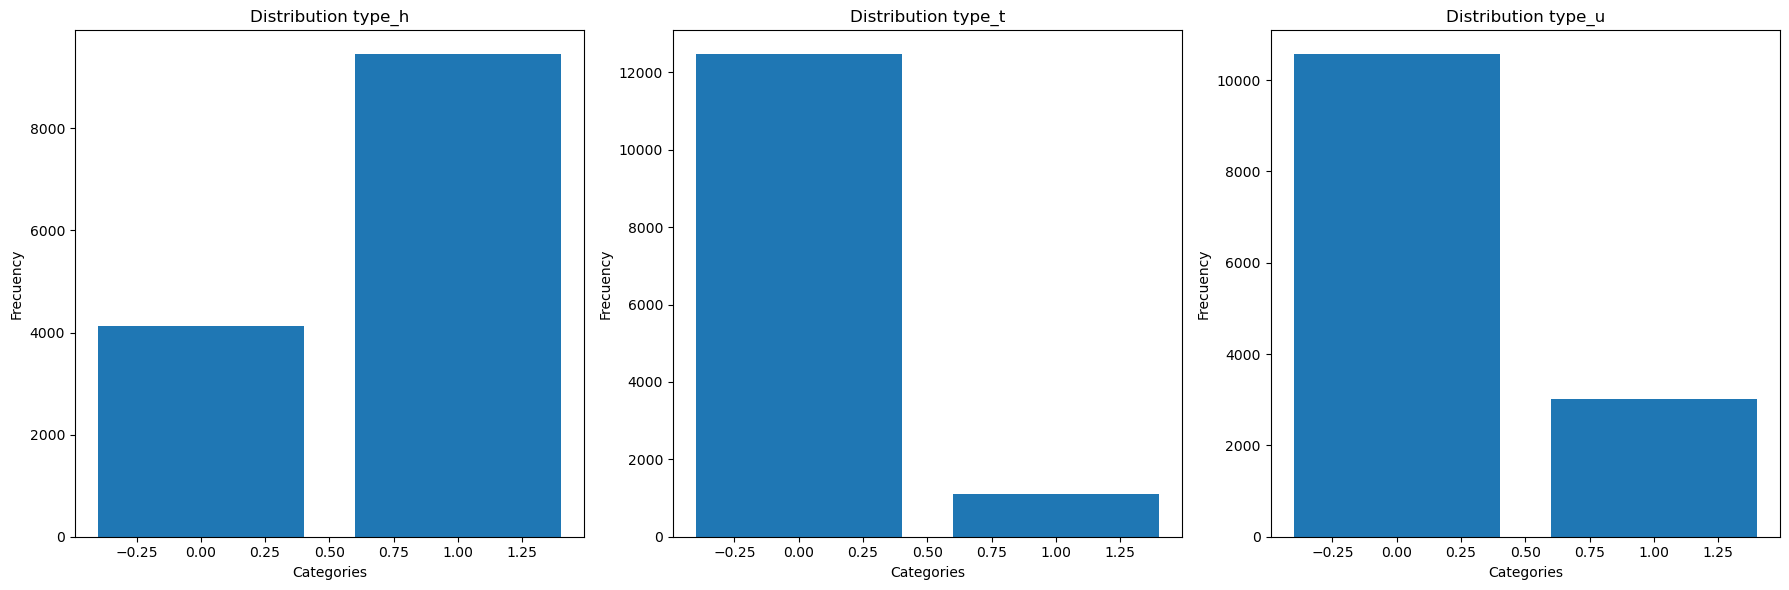

In [160]:
import matplotlib.pyplot as plt

# Contar las instancias de cada categoría en cada columna
conteo_type_h = dummy_type['type_h'].value_counts()
conteo_type_t = dummy_type['type_t'].value_counts()
conteo_type_u = dummy_type['type_u'].value_counts()

# Obtener los nombres de las categorías y sus frecuencias para cada columna
nombres_type_h = conteo_type_h.index
frecuencias_type_h = conteo_type_h.values

nombres_type_t = conteo_type_t.index
frecuencias_type_t = conteo_type_t.values

nombres_type_u = conteo_type_u.index
frecuencias_type_u = conteo_type_u.values

# Crear la gráfica de barras para cada columna
fig, axs = plt.subplots(1, 3, figsize=(18, 6)) #1 fila y 3 columnas

# Gráfica para la columna 'type_h'
axs[0].bar(nombres_type_h, frecuencias_type_h)
axs[0].set_xlabel('Categories')
axs[0].set_ylabel('Frecuency')
axs[0].set_title('Distribution type_h')

# Gráfica para la columna 'type_t'
axs[1].bar(nombres_type_t, frecuencias_type_t)
axs[1].set_xlabel('Categories')
axs[1].set_ylabel('Frecuency')
axs[1].set_title('Distribution type_t')

# Gráfica para la columna 'type_u'
axs[2].bar(nombres_type_u, frecuencias_type_u)
axs[2].set_xlabel('Categories')
axs[2].set_ylabel('Frecuency')
axs[2].set_title('Distribution type_u')

# Ajustar el espaciado entre subplots y mostrar la gráfica
plt.tight_layout()
plt.show()


# Concat the new columns
concat the columns: 'type_h', 'type_t' and 'type_u' and delete the old column 'Type'

In [161]:
database = pd.concat([database, dummy_type], axis=1)
database.drop(columns='Type')

,Suburb,Address,Rooms,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,Longtitude,Regionname,Propertycount,FillCar,Day,Month,Year,type_h,type_t,type_u
0,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,144.99840,Northern Metropolitan,4019.0,0,3,12,2016,1,0,0
1,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,144.99340,Northern Metropolitan,4019.0,0,4,2,2016,1,0,0
2,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,...,144.99440,Northern Metropolitan,4019.0,0,4,3,2017,1,0,0
3,Abbotsford,40 Federation La,3,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,...,144.99690,Northern Metropolitan,4019.0,0,4,3,2017,1,0,0
4,Abbotsford,55a Park St,4,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,...,144.99410,Northern Metropolitan,4019.0,0,4,6,2016,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,1245000.0,S,Barry,16.7,3150.0,4.0,2.0,...,145.16761,South-Eastern Metropolitan,7392.0,0,26,8,2017,1,0,0
13576,Williamstown,77 Merrett Dr,3,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,...,144.87904,Western Metropolitan,6380.0,0,26,8,2017,1,0,0
13577,Williamstown,83 Power St,3,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,...,144.88738,Western Metropolitan,6380.0,0,26,8,2017,1,0,0
13578,Williamstown,96 Verdon St,4,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,...,144.89299,Western Metropolitan,6380.0,0,26,8,2017,1,0,0


## Codifing the variable 'Method'

In [163]:
dummy_method = pd.get_dummies(database['Method'], prefix='Method')

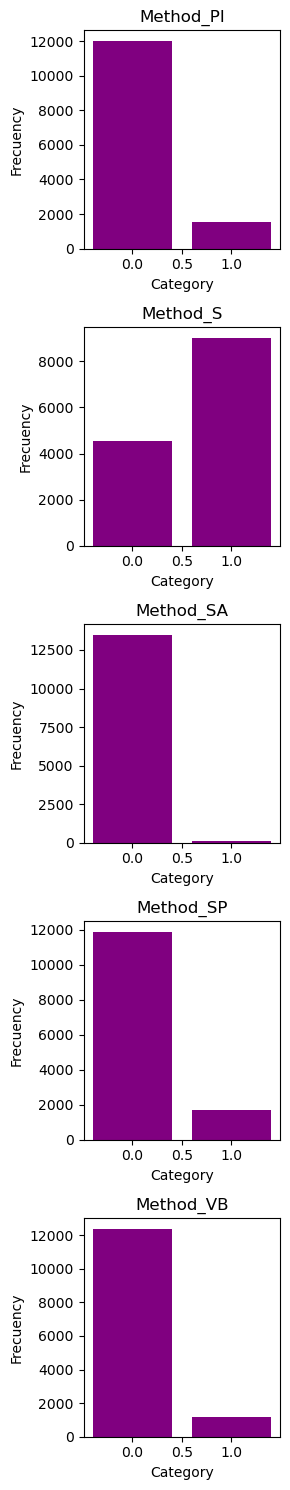

In [213]:
columns = dummy_method[1:]

fig, axes = plt.subplots(5, 1, figsize=(3,15))#5 filas, 1 columnas 

for i, column in enumerate(columns):
    count = dummy_method[column].value_counts()
    category_name = count.index
    category_frecuency = count.values
    #row_index, col_index = np.unravel_index(i, (2, 3)) 
    
    axes[i].bar(category_name, category_frecuency, color='purple')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Frecuency')
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

# Concat the new columns
concat the 'dummy_method' columns and delete the old column 'Method'

In [214]:
database = pd.concat([database.drop(columns='Method'), dummy_method], axis=1)

In [217]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   SellerG        13580 non-null  object 
 6   Distance       13580 non-null  float64
 7   Postcode       13580 non-null  float64
 8   Bedroom2       13580 non-null  float64
 9   Bathroom       13580 non-null  float64
 10  Car            13580 non-null  float64
 11  Landsize       13580 non-null  float64
 12  Lattitude      13580 non-null  float64
 13  Longtitude     13580 non-null  float64
 14  Regionname     13580 non-null  object 
 15  Propertycount  13580 non-null  float64
 16  FillCar        13580 non-null  int64  
 17  Day            13580 non-null  int64  
 18  Month 

# Selection of variables

Select the dependent variable and the independent variables

In [23]:
y = database.Price
x = database.drop(columns='Price')
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Method         13580 non-null  object 
 5   SellerG        13580 non-null  object 
 6   Distance       13580 non-null  float64
 7   Postcode       13580 non-null  float64
 8   Bedroom2       13580 non-null  float64
 9   Bathroom       13580 non-null  float64
 10  Landsize       13580 non-null  float64
 11  Lattitude      13580 non-null  float64
 12  Longtitude     13580 non-null  float64
 13  Regionname     13580 non-null  object 
 14  Propertycount  13580 non-null  float64
 15  Day            13580 non-null  int64  
 16  Month          13580 non-null  int64  
 17  Year           13580 non-null  int64  
dtypes: flo

# Encoder the categorical variables
We need encode the categorical variables so as to train the model 

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in x.select_dtypes(include=['object']):
    x[column] = encoder.fit_transform(x[column])

#categorical_codf = pd.get_dummies(categorical_col)
#x = pd.concat([x.drop(columns=categorical_col),categorical_codf], axis=1 )
x.head()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int64  
 1   Address        13580 non-null  int64  
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  int64  
 4   Method         13580 non-null  int64  
 5   SellerG        13580 non-null  int64  
 6   Distance       13580 non-null  float64
 7   Postcode       13580 non-null  float64
 8   Bedroom2       13580 non-null  float64
 9   Bathroom       13580 non-null  float64
 10  Landsize       13580 non-null  float64
 11  Lattitude      13580 non-null  float64
 12  Longtitude     13580 non-null  float64
 13  Regionname     13580 non-null  int64  
 14  Propertycount  13580 non-null  float64
 15  Day            13580 non-null  int64  
 16  Month          13580 non-null  int64  
 17  Year           13580 non-null  int64  
dtypes: flo

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 1)

# First model: Decision tree Regressor
The first model will be the decision tree.

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

class validation:
    y_val = 0
    y_pred = 0
    y = 0
    mae = 0
    r2 = 0
    rmse = 0
    mape = 0
    ceofVar = 0
    parameter = ' '
    
    def __init__(self, y_val, y_pred, y):
        self.y_val = y_val
        self.y_pred = y_pred
        self.y = y
        mse = mean_squared_error(self.y_val, self.y_pred)
        self.mae = mean_absolute_error(self.y_val, self.y_pred)
        self.r2 = r2_score(self.y_val, self.y_pred)
        self.rmse = np.sqrt(mse)
        self.mape = np.mean(np.abs((self.y_val - self.y_pred) / self.y_val)) * 100 
        self.coefVar = self.mae/self.y.mean()
        
    def validation_metrics(self):
        print('Mean Absolute Error: ', self.mae,'\nR2 score: ',self.r2,'\nRoot Mean Squared Error: ',
              self.rmse,'\nMean Absolute Percentage Error: ',self.mape,'\nCoefficient Of Variation: ',self.coefVar
             ,'\nY mean: ',self.y.mean())
    def parameters(self, parameter):
        self.parameter = parameter

In [36]:
import itertools
criterions = ['squared_error', 'friedman_mse', 'poisson', 'absolute_error']
splitters = ['random', 'best']
max_depths = [3, 5, 7, 10]
max_features = [None, 'sqrt', 'log2']
result = list()

In [37]:
for criterion, splitter, max_depth, max_feature in itertools.product(criterions,splitters, max_depths, max_features):
    model_TR = DecisionTreeRegressor(criterion=criterion, splitter = splitter, max_depth = max_depth, max_features = max_feature, random_state=1)
    model_TR = model_TR.fit(x_train,y_train)
    y_pred = model_TR.predict(x_val)
    obj_validation = validation(y_val, y_pred,y)
    obj_validation.parameters(f'Criterion: {criterion}, Splitter: {splitter},Max Depth: {max_depth}, Max Features: {max_feature} \n')
    result.append(obj_validation)


In [38]:
sorted_list= sorted(result, key = lambda obj: obj.mae)
for i in range(0,5):
    obj = sorted_list[i]
    obj.validation_metrics()
    print(obj.parameter)

Mean Absolute Error:  215468.90746195384 
R2 score:  0.6558134535965217 
Root Mean Squared Error:  370959.9108776395 
Mean Absolute Percentage Error:  19.256958634847106 
Coefficient Of Variation:  0.20030872593290205 
Y mean:  1075684.079455081
Criterion: absolute_error, Splitter: best,Max Depth: 10, Max Features: None 

Mean Absolute Error:  217440.17432346288 
R2 score:  0.6321387115949495 
Root Mean Squared Error:  383505.9241695821 
Mean Absolute Percentage Error:  20.087337009153178 
Coefficient Of Variation:  0.20214129638658734 
Y mean:  1075684.079455081
Criterion: poisson, Splitter: best,Max Depth: 10, Max Features: None 

Mean Absolute Error:  218226.81590574374 
R2 score:  0.6835039011266304 
Root Mean Squared Error:  355724.8573604761 
Mean Absolute Percentage Error:  19.66126190427165 
Coefficient Of Variation:  0.202872590636735 
Y mean:  1075684.079455081
Criterion: absolute_error, Splitter: best,Max Depth: 7, Max Features: None 

Mean Absolute Error:  220114.6525504256

In [39]:
criterions = ['squared_error', 'poisson', 'absolute_error']
max_depths = [7,8,9,10,11,12,13,14,15]

In [40]:
result = list()
for criterion, max_depth in itertools.product(criterions, max_depths):
    model_TR2 = DecisionTreeRegressor(criterion = criterion, max_depth = max_depth, splitter ='best', max_features=None, random_state=1).fit(x_train,y_train)
    y_pred = model_TR2.predict(x_val)
    obj_validation = validation(y_val, y_pred, y)
    obj_validation.parameters(f'Criterion: {criterion} Max depth: {max_depth}\n')
    result.append(obj_validation)

In [41]:
sorted_list= sorted(result, key = lambda obj: obj.mae)
for i in range(0,5):
    obj = sorted_list[i]
    obj.validation_metrics()
    print(obj.parameter)

Mean Absolute Error:  211687.45446735396 
R2 score:  0.6945264812462404 
Root Mean Squared Error:  349475.5660988631 
Mean Absolute Percentage Error:  19.0353217337811 
Coefficient Of Variation:  0.19679333227148849 
Y mean:  1075684.079455081
Criterion: absolute_error Max depth: 8

Mean Absolute Error:  214016.4237777155 
R2 score:  0.6990369627653985 
Root Mean Squared Error:  346885.8732354914 
Mean Absolute Percentage Error:  19.949928174488164 
Coefficient Of Variation:  0.19895843757967652 
Y mean:  1075684.079455081
Criterion: poisson Max depth: 9

Mean Absolute Error:  214041.3996072656 
R2 score:  0.6791653160314605 
Root Mean Squared Error:  358154.72839208716 
Mean Absolute Percentage Error:  19.35384360388167 
Coefficient Of Variation:  0.1989816561342941 
Y mean:  1075684.079455081
Criterion: absolute_error Max depth: 9

Mean Absolute Error:  215468.90746195384 
R2 score:  0.6558134535965217 
Root Mean Squared Error:  370959.9108776395 
Mean Absolute Percentage Error:  19.

# Second model:



In [ ]:
from sklearn.linear_model import SGDRegressor

model2 = SGDRegressor().fit(x_train, y_train)